# GTIF Convert a vector (shape file) into a raster (Geotiff)

In [1]:
#import geopandas as gpd
#import gdal
#import fiona

## 1. Reading shapefile using geopandas

In [2]:
#import os
#import geopandas as gpd
#import matplotlib.pyplot as plt
#%matplotlib inline

In [3]:
#shapefile = gpd.read_file(r'C:\CFL_41.shp')
#shapefile = gpd.read_file(r"C:\Archive(2)\CS41.shp")
#shapefile = shapefile.drop(columns=['KG', 'NS_RECHT'])
#shapefile

,NS,geometry
0,41,"POLYGON ((624742.810 486260.869, 624794.403 48..."
1,41,"POLYGON ((624742.810 486260.869, 624794.786 48..."
2,41,"POLYGON ((624803.268 486260.081, 624806.165 48..."
3,41,"POLYGON ((624846.282 486258.252, 624854.264 48..."
4,41,"POLYGON ((624568.752 486226.651, 624559.791 48..."
...,...,...
4385829,41,"POLYGON ((124557.078 380598.786, 124563.794 38..."
4385830,41,"POLYGON ((124611.025 380587.817, 124609.484 38..."
4385831,41,"POLYGON ((124566.373 380589.646, 124564.398 38..."
4385832,41,"POLYGON ((124552.031 380525.477, 124547.748 38..."


In [4]:
#shapefile.columns

Index(['NS', 'geometry'], dtype='object')

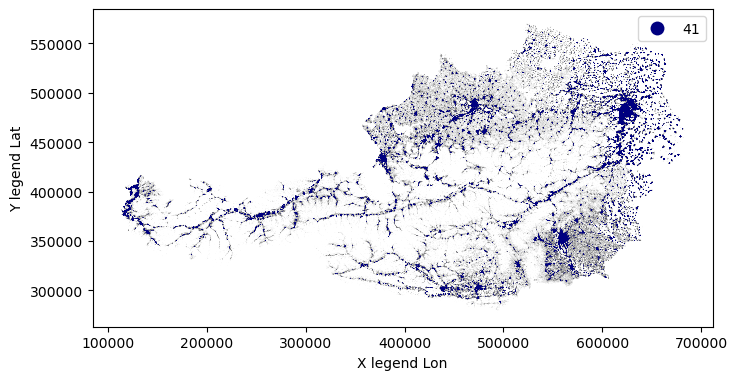

In [5]:
#fig, ax = plt.subplots(1, figsize = (8,12))
#shapefile.plot(ax=ax, column = 'NS', cmap = 'jet', legend = True)
#plt.xlabel('X legend Lon')
#plt.ylabel('Y legend Lat')
#plt.show()


In [6]:
#shapefile.crs

<Projected CRS: EPSG:31287>
Name: MGI / Austria Lambert
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Austria
- bounds: (9.53, 46.4, 17.17, 49.02)
Coordinate Operation:
- name: Austria Lambert
- method: Lambert Conic Conformal (2SP)
Datum: Militar-Geographische Institut
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

## 2. Converting shapefile to raster

In [4]:
from osgeo import gdal, ogr, osr

In [5]:
#input_shp = ogr.Open(r'C:\CFL_41.shp')
input_shp = ogr.Open(r"C:\Archive(2)\CS41.shp")
#get all the layers
source_layer = input_shp.GetLayer()
# look at all columns/attributes
defn = source_layer.GetLayerDefn()
column_names = []
for n in range(defn.GetFieldCount()):
    fdefn = defn.GetFieldDefn(n)
    column_names.append(fdefn.name)

In [6]:
#specify location
#output_raster_location = r'C:\raster_created.tif'
output_raster_location = r'C://Users//Sara Aparício//Dropbox//Python//raster10.tif'
# depends on projection 4327..
pixel_size = 1# 1 meter

In [ ]:
#from shapefile get boundaries
xmin, xmax, ymin, ymax = source_layer.GetExtent()
x_res = int(round(xmax-xmin)/pixel_size)
y_res = int(round(ymax-ymin)/pixel_size)

#creates memory target raster
target_ds = gdal.GetDriverByName('GTiff').Create(output_raster_location,x_res,y_res,1,gdal.GDT_Int32,['COMPRESS=LZW'])
#Specifies the spatial reference of the raster datase
#Where each element represents a parameter that defines the position and size of pixels in the dataset
target_ds.SetGeoTransform((xmin, pixel_size,0.0,ymax,0.0, -pixel_size))

#Creates a spatial reference object
srse = osr.SpatialReference()
proj = 'EPSG:3857'# correct it 'EPSG:31287' # before it was 'EPSG:31255' and it worked....file rasterV was the result
srse.SetWellKnownGeogCS(proj)
#Sets the projection to the input dataset
target_ds.SetProjection(srse.ExportToWkt())
band = target_ds.GetRasterBand(1)
target_ds.GetRasterBand(1)#.SetNoDataValues(-9999)
#band.Fill(-9999)

## APPLYING THE GDAL.RASTERIZE

gdal.RasterizeLayer(target_ds,[1], source_layer,None, None, [1], options = ['ALL_TOUCHED=TRUE', 'ATTRIBUTE=NS'])

target_ds = None

# burnValues=0

### 2.1 Inspect resulting raster

In [6]:
#import xarray as xr
#output_raster_location = r'C://Users//Sara Aparício//Dropbox//Python//raster2.tif'
#raster = xr.open_rasterio(output_raster_location).squeeze()

In [1]:
#import rasterio
#from matplotlib import pyplot
#src = rasterio.open(output_raster_location)
#src.read(1)
#pyplot.imshow(src.read(1).reshape( 2921040, 5702100), cmap='pink')

#pyplot.show()

In [2]:
#raster.shape

In [3]:
#raster

In [ ]:
#import rasterio
#from rasterio.plot import show
#fp = r'C://Users//Sara Aparício//Dropbox//Python//rasterAU.tif'
#img = rasterio.open(fp)
#show(img)
#img.crs

In [ ]:
#print(img.bounds)

## 3. Save as a COG 

In [ ]:
# UPDATE HERE THE LOCATION OF THE RASTER !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
output_raster_location = r'C://Users//Sara Aparício//Dropbox//Python//raster01.tif'

In [ ]:

# Define path name where raster is
old_name = output_raster_location

#Settings for the conversion to COG
compression =  ' -co COMPRESS=LZW'
output_format2 = ' -of COG'

# Name of the varialbe to be extracted
#var_name = 'ffp_values'
# Writes the netcdf with selected varialbe in the format to be used/read for the gdal translate
sublayername =  gdal.Open(old_name,gdal.GA_ReadOnly)


In [ ]:
old_name[0:43]

In [ ]:
# CONVERTST REPROJECTED TIF TO COG ######################################################################################
inname2 =  old_name[0:43] + 'raster01.tif'
outname2 = old_name[0:43] + 'Final01.tif'
print("Confirming Output file name is:", outname2)
print("Confirming Input file name is :", inname2)
ds = gdal.Translate(outname2, inname2, options=" -of COG -co COMPRESS=LZW")
del ds
print("ALL DONE!")

In [ ]:
import rasterio
from rasterio.plot import show
fp = r'C://Users//Sara Aparício//Dropbox//Python//Final01.tif'
img = rasterio.open(fp)
show(img)

## END